In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('training.csv')

df["Name Length"] = df["Name"].apply(len)

df.to_csv('training.csv', index=False)

In [15]:
print(df["Name Length"].describe())

count    891.000000
mean      26.965208
std        9.281607
min       12.000000
25%       20.000000
50%       25.000000
75%       30.000000
max       82.000000
Name: Name Length, dtype: float64


/tmp/ipykernel_20518/109555357.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_Rate = df.groupby("Name Length Bins")["Survived"].mean()


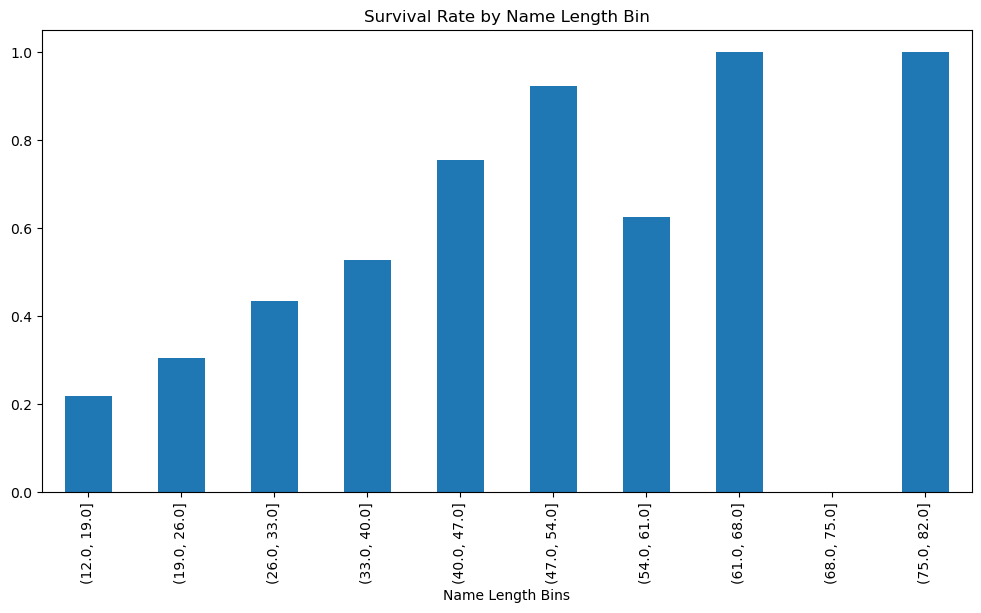

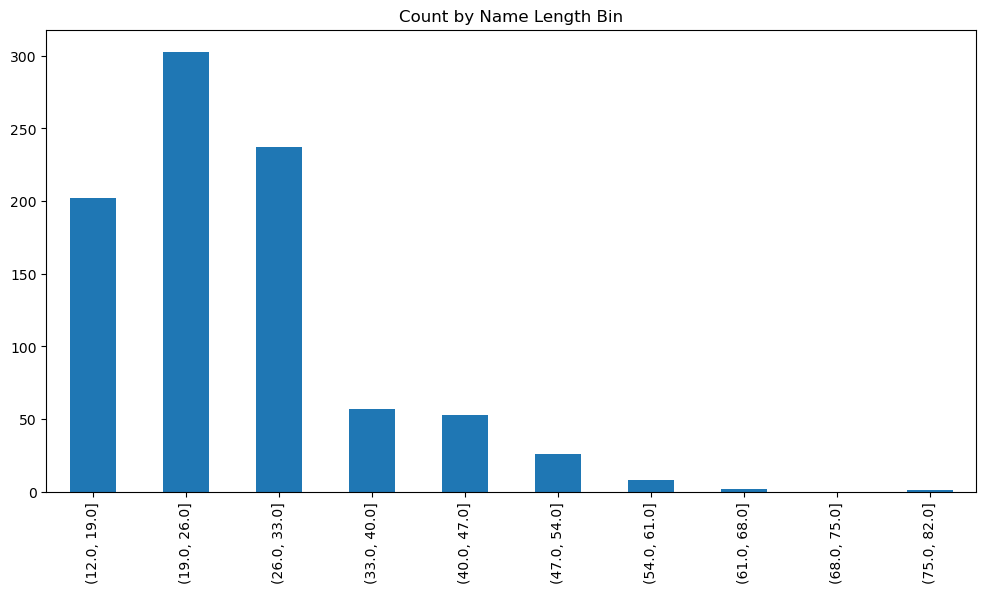

In [ ]:
import numpy as np

bins = np.linspace(df["Name Length"].min(), df["Name Length"].max(), num=11)
df["Name Length Bins"] = pd.cut(df["Name Length"], bins)

survival_Rate = df.groupby("Name Length Bins")["Survived"].mean()
survival_Rate.plot(kind="bar", figsize=(12, 6))
plt.title("Survival Rate by Name Length Bin")
plt.show()

df["Name Length Bins"].value_counts().reindex(df["Name Length Bins"].cat.categories, fill_value=0).plot(kind="bar", figsize=(12, 6))
plt.title("Count by Name Length Bin")
plt.show()

In [46]:
df.drop("Name Length Bins", axis=1, inplace=True)

In [47]:
df["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [48]:
survival_rate_pclass = df.groupby("Pclass")["Survived"].mean()
print(survival_rate_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [49]:
df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [50]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
df["AgeEstimated"] = df["Age"].apply(lambda x: 1 if pd.isna(x) or (isinstance(x, float) and x % 1 == 0.5) else 0)
df.to_csv('training.csv', index=False)

In [53]:
print("Miss.:", df[df["Name"].str.contains("Miss.")]["Age"].mean())
print("Mr.:", df[df["Name"].str.contains("Mr.")]["Age"].mean())
print("Mrs.:", df[df["Name"].str.contains("Mrs.")]["Age"].mean())
print("Master.:", df[df["Name"].str.contains("Master.")]["Age"].mean())

Miss.: 21.773972602739725
Mr.: 33.11839530332681
Mrs.: 35.642857142857146
Master.: 4.574166666666667


In [ ]:
age_map = {
    "Miss.": 21.8,
    "Mr.": 33.1,
    "Mrs.": 35.6,
    "Master.": 4.6
}

def fill_age(row):
    if pd.isna(row["Age"]):
        for title, avg_age in age_map.items():
            if title in row["Name"]:
                return avg_age
        return row["Age"] 
    return row["Age"]

df["Age"] = df.apply(fill_age, axis=1)

In [57]:
df["Age"].describe()

count    890.000000
mean      29.834236
std       13.296600
min        0.420000
25%       21.800000
50%       30.000000
75%       35.600000
max       80.000000
Name: Age, dtype: float64

In [ ]:
missing_age_passenger_ids = df[df["Age"].isna()]["PassengerId"].tolist()
print(missing_age_passenger_ids)

#case handled manually

[767]


In [65]:
df.to_csv("training.csv", index=False)

In [69]:
df = pd.read_csv("training.csv")
df["Age"].describe()

count    891.000000
mean      29.837901
std       13.289578
min        0.420000
25%       21.800000
50%       30.000000
75%       35.600000
max       80.000000
Name: Age, dtype: float64

In [75]:
df["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [76]:
df["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [99]:
print(df[df["SibSp"] == 0].shape[0], df[df["SibSp"] == 1].shape[0])
print(df[df["Parch"] == 0].shape[0], df[df["Parch"] == 1].shape[0])

608 209
678 118


/tmp/ipykernel_20518/212055123.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_sibsp = df.groupby("SibSp_bucket")["Survived"].mean()


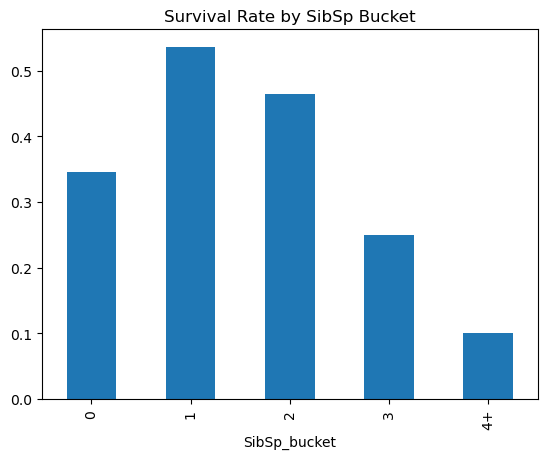

/tmp/ipykernel_20518/212055123.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_parch = df.groupby("Parch_bucket")["Survived"].mean()


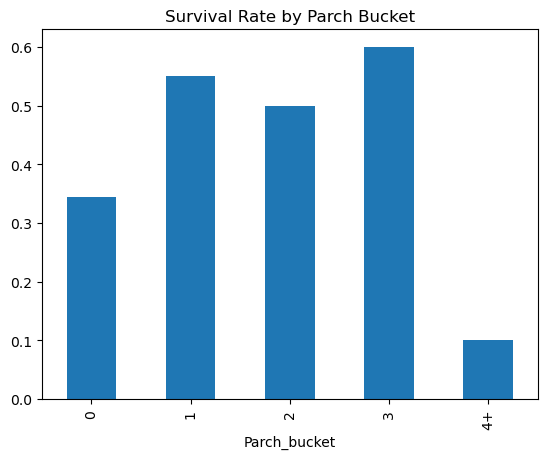

In [ ]:
df["SibSp_bucket"] = pd.cut(df["SibSp"], bins=[-1,0,1,2,3,8], labels=["0","1","2","3","4+"])
survival_sibsp = df.groupby("SibSp_bucket")["Survived"].mean()
survival_sibsp.plot(kind="bar", title="Survival Rate by SibSp Bucket")
plt.show()

df["Parch_bucket"] = pd.cut(df["Parch"], bins=[-1,0,1,2,3,6], labels=["0","1","2","3","4+"])
survival_parch = df.groupby("Parch_bucket")["Survived"].mean()
survival_parch.plot(kind="bar", title="Survival Rate by Parch Bucket")
plt.show()

537 29


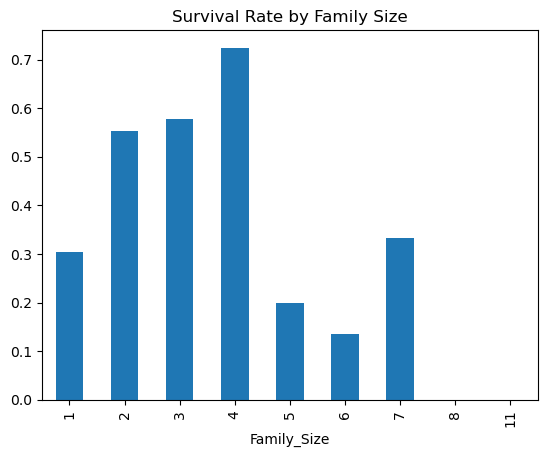

In [108]:
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1

print(df[df["Family_Size"] == 1].shape[0], df[df["Family_Size"] == 4].shape[0])

survival_family_size = df.groupby("Family_Size")["Survived"].mean()
survival_family_size.plot(kind="bar", title="Survival Rate by Family Size")
plt.show()

In [109]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'SibSp_bucket', 'Parch_bucket', 'Family_Size'],
      dtype='object')

In [110]:
df.drop(["SibSp_bucket", "Parch_bucket"], axis=1, inplace=True)


In [111]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'Family_Size'],
      dtype='object')

In [112]:
df["isAlone"] = (df["Family_Size"] == 1).astype(int)

In [135]:
df.drop("Family_Size", axis=1, inplace=True)

In [114]:
survival_isalone = df.groupby("isAlone")["Survived"].mean()
print(survival_isalone)

isAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


In [115]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [118]:
ticket_first_chars = df["Ticket"].astype(str).str[0]
counts = ticket_first_chars.value_counts()
survival_rates = df.groupby(ticket_first_chars)["Survived"].mean()

print("Number of unique first characters:", counts.shape[0])
for char in counts.index:
    print(f"{char}: {counts[char]}, Survival Rate: {survival_rates[char]:.2f}")

Number of unique first characters: 16
3: 301, Survival Rate: 0.24
2: 183, Survival Rate: 0.46
1: 146, Survival Rate: 0.63
P: 65, Survival Rate: 0.65
S: 65, Survival Rate: 0.32
C: 47, Survival Rate: 0.34
A: 29, Survival Rate: 0.07
W: 13, Survival Rate: 0.15
4: 10, Survival Rate: 0.20
7: 9, Survival Rate: 0.11
F: 7, Survival Rate: 0.57
6: 6, Survival Rate: 0.17
L: 4, Survival Rate: 0.25
5: 3, Survival Rate: 0.00
8: 2, Survival Rate: 0.00
9: 1, Survival Rate: 1.00


In [119]:
df["Ticket_Prefix"] = df["Ticket"].astype(str).str[0]

In [121]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/tmp/ipykernel_20518/78576743.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_fare = df.groupby("Fare_Bucket")["Survived"].mean()


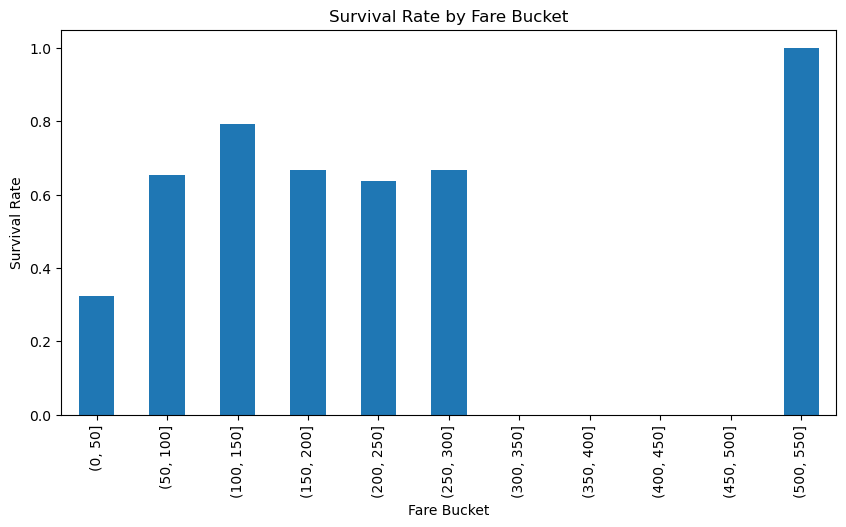

In [122]:
fare_bins = range(0, int(df["Fare"].max()) + 51, 50)
df["Fare_Bucket"] = pd.cut(df["Fare"], bins=fare_bins)
survival_fare = df.groupby("Fare_Bucket")["Survived"].mean()
survival_fare.plot(kind="bar", title="Survival Rate by Fare Bucket", figsize=(10,5))
plt.xlabel("Fare Bucket")
plt.ylabel("Survival Rate")
plt.show()

In [133]:
df.drop("Fare_Bucket", axis=1, inplace=True)

In [123]:
df["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [125]:
empty_cabin_survival = df[df["Cabin"].isna()]["Survived"].mean()
nonempty_cabin_survival = df[df["Cabin"].notna()]["Survived"].mean()

print(f"Survival rate if Cabin is empty: {empty_cabin_survival:.2f}")
print(f"Survival rate if Cabin is non-empty: {nonempty_cabin_survival:.2f}")

Survival rate if Cabin is empty: 0.30
Survival rate if Cabin is non-empty: 0.67


In [ ]:
df_nonempty_cabin = df[df["Cabin"].notna()]

df_nonempty_cabin["Cabin_First"] = df_nonempty_cabin["Cabin"].astype(str).str[0]

cabin_counts = df_nonempty_cabin["Cabin_First"].value_counts()
cabin_survival = df_nonempty_cabin.groupby("Cabin_First")["Survived"].mean()

print("Cabin first letter group counts and survival rates:")
for letter in cabin_counts.index:
    print(f"{letter}: Count = {cabin_counts[letter]}, Survival Rate = {cabin_survival[letter]:.2f}")

Cabin first letter group counts and survival rates:
C: Count = 59, Survival Rate = 0.59
B: Count = 47, Survival Rate = 0.74
D: Count = 33, Survival Rate = 0.76
E: Count = 32, Survival Rate = 0.75
A: Count = 15, Survival Rate = 0.47
F: Count = 13, Survival Rate = 0.62
G: Count = 4, Survival Rate = 0.50
T: Count = 1, Survival Rate = 0.00


/tmp/ipykernel_20518/1640093788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonempty_cabin["Cabin_First"] = df_nonempty_cabin["Cabin"].astype(str).str[0]


In [130]:
cabin_survival_map = {
    "A": 0.47,
    "B": 0.74,
    "C": 0.59,
    "D": 0.76,
    "E": 0.75,
    "F": 0.62,
    "G": 0.50,
    "T": 0.00
}

def cabin_info(row):
    if pd.isna(row["Cabin"]):
        return 0.30
    first_letter = str(row["Cabin"])[0]
    return cabin_survival_map.get(first_letter, 0.30)

df["CabinInfo"] = df.apply(cabin_info, axis=1)

In [136]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'isAlone', 'Ticket_Prefix', 'CabinInfo'],
      dtype='object')

In [137]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [139]:
df["Embarked"].fillna("S", inplace=True)

In [141]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Length',
       'AgeEstimated', 'isAlone', 'Ticket_Prefix', 'CabinInfo'],
      dtype='object')

In [142]:
df.to_csv("training.csv", index=False)

In [143]:
df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [145]:
df.drop("PassengerId", axis=1, inplace=True)


In [146]:
df.to_csv("final_training.csv", index=False)

In [147]:
print(df.isna().sum())

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Name Length      0
AgeEstimated     0
isAlone          0
Ticket_Prefix    0
CabinInfo        0
dtype: int64
